In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
import time
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.shape

(12330, 18)

In [ ]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [ ]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

**visualisations**

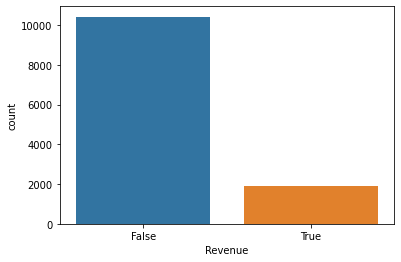

In [ ]:
plt1 = sns.countplot(x='Revenue',data=data)
plt.show()

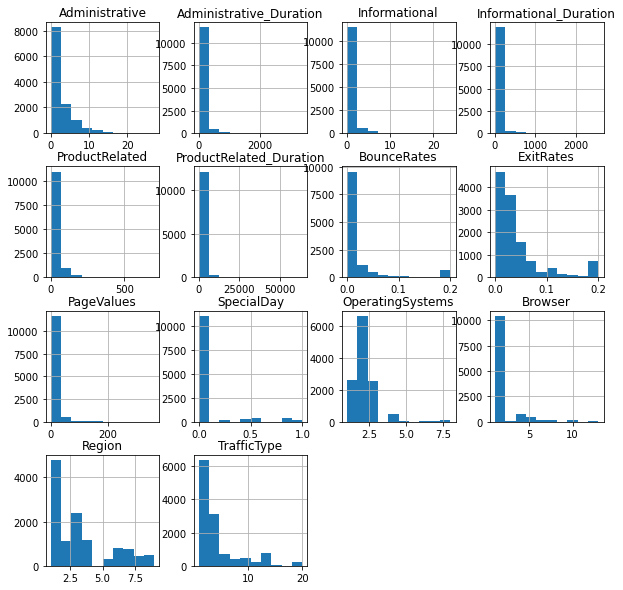

In [ ]:
plt2 = data.hist(bins = 10,figsize=(10,10))
plt.show()

<Axes: >

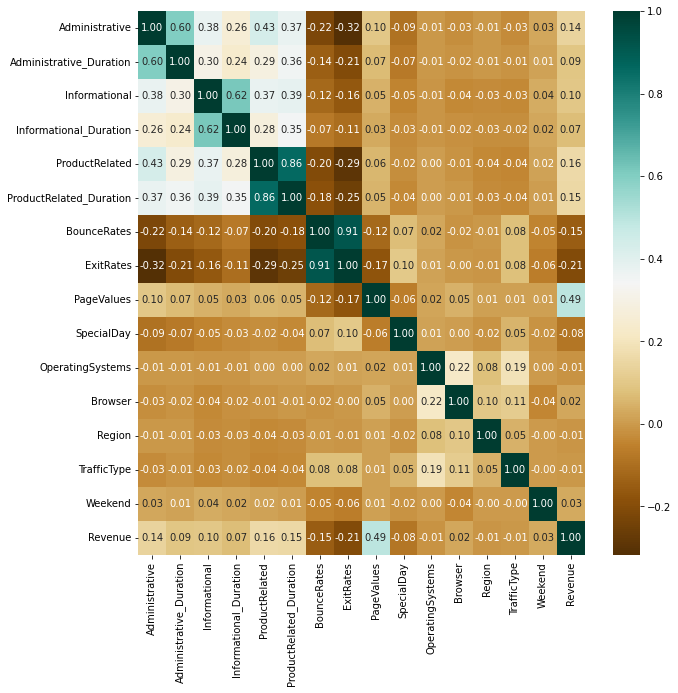

In [ ]:
plt3_corr = data.corr()
plt.figure(figsize=(10,10))

sns.heatmap(plt3_corr,annot= True,cmap = 'BrBG',fmt='.2f',annot_kws={"size":10}) #OperatingSystems,Browser,Region,TrafficType,Weekend have less correlation with target Revenue column

**preprocessing**

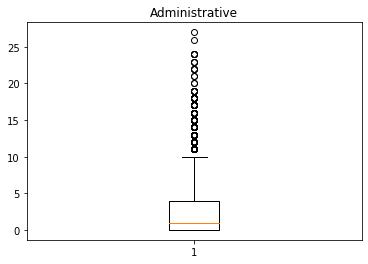

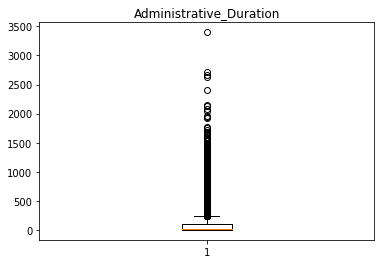

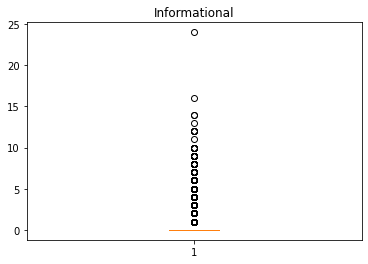

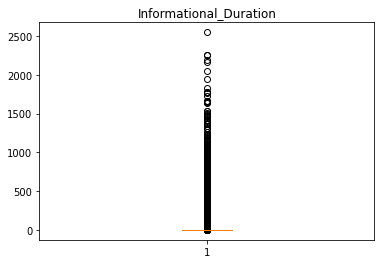

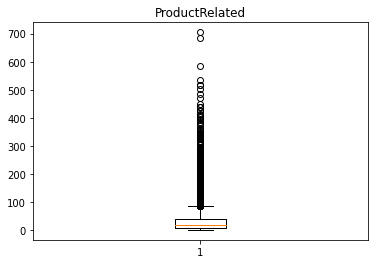

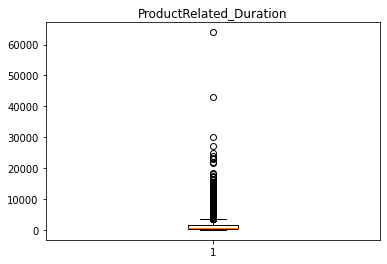

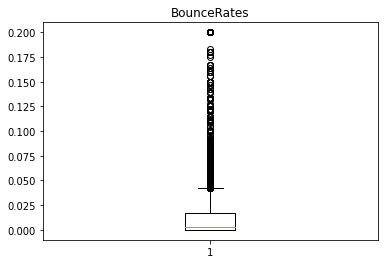

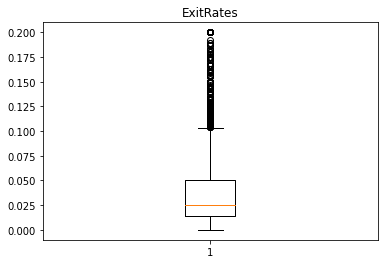

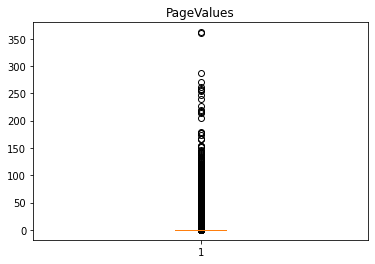

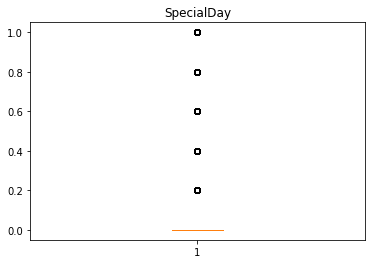

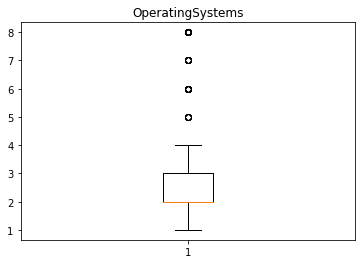

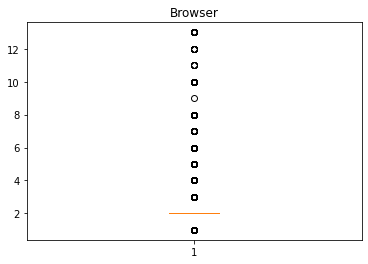

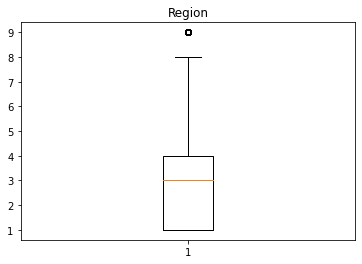

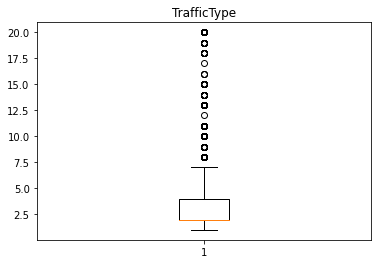

In [ ]:
# checking the outliers in a columns by plotting boxplots


cols = data.select_dtypes(include=['float','int'])

for col in cols:
  plt.figure()
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

In [ ]:
# filling outliers with quartile() function

for col in cols:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 -1.5*iqr
  upper_bound = q3 + 1.5*iqr
  data[col] = data[col].apply(lambda x:upper_bound if x >upper_bound else lower_bound if x < lower_bound else x )

In [ ]:
data.shape

(12330, 18)

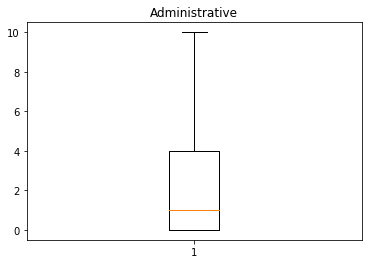

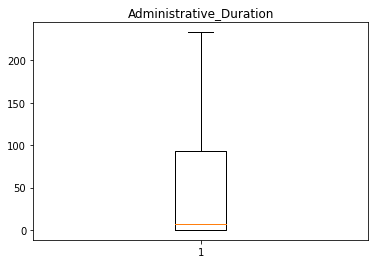

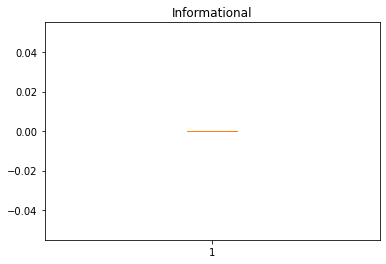

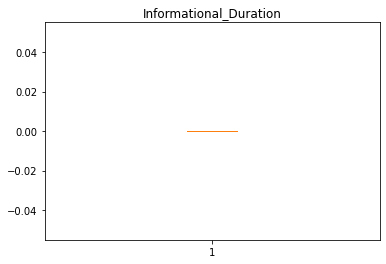

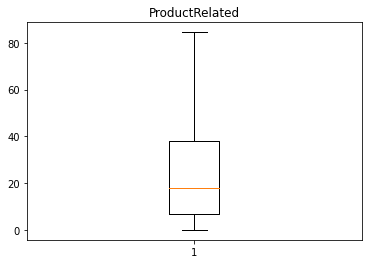

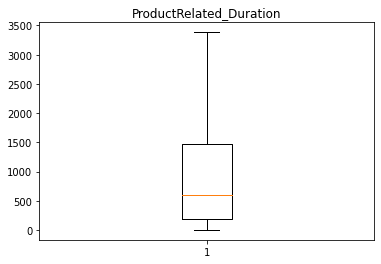

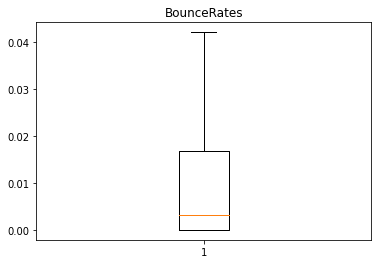

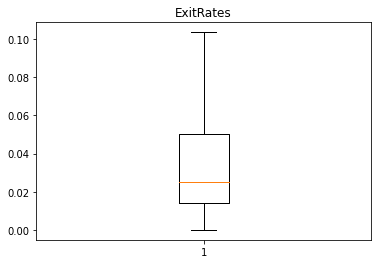

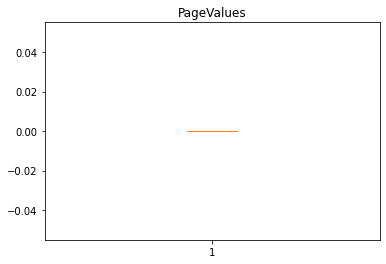

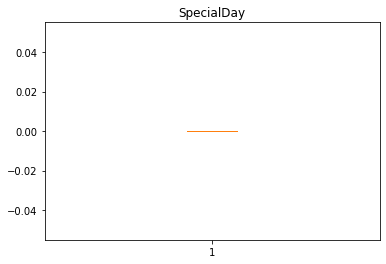

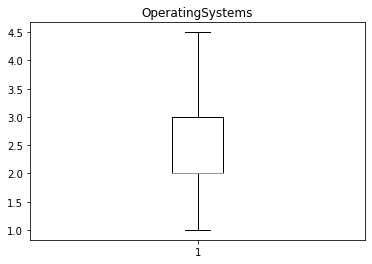

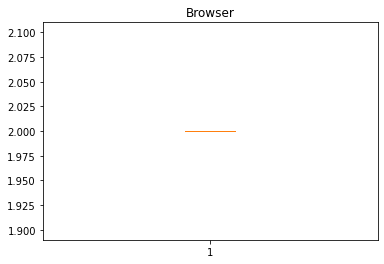

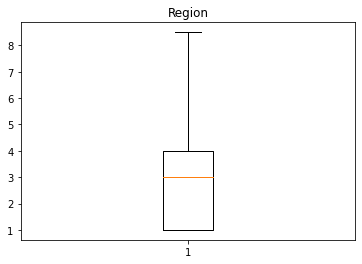

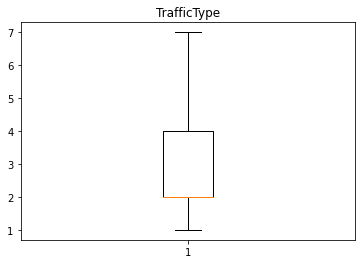

In [ ]:
for col in cols:
  plt.figure()
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

In [ ]:
# dropping features which have less correlation with target column

data = data.drop(['OperatingSystems','Browser','Region','TrafficType','Weekend'],axis='columns')

In [ ]:
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,Returning_Visitor,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,Feb,Returning_Visitor,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,Returning_Visitor,False


In [ ]:
data.shape

(12330, 13)

In [ ]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'VisitorType', 'Revenue'],
      dtype='object')

In [ ]:
# applying labelencoder to categorical columns

labelencoder = LabelEncoder()
data['Month'] = labelencoder.fit_transform(data['Month'])
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,Returning_Visitor,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,2,Returning_Visitor,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,Returning_Visitor,False


In [ ]:
labelencoder = LabelEncoder()
data['VisitorType'] = labelencoder.fit_transform(data['VisitorType'])
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,2,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,2,False


In [ ]:
labelencoder = LabelEncoder()
data['Revenue'] = labelencoder.fit_transform(data['Revenue'])
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,2,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,2,2,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,2,2,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,2,2,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,2,2,0


**Model Building**

In [ ]:
# defining X and y & split the dataset 


X= data.drop(columns=['Revenue'])
y = data['Revenue']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)

In [ ]:
# applying the standardscaler to fit the training data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
start_time = time.time()

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)

In [ ]:
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds ")

Execution time: 0.07 seconds 


In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_test = model.predict(X_test_scaled)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
def evaluate_model(act, pred):
  from sklearn.metrics import confusion_matrix, accuracy_score,\
  recall_score, precision_score

  print("Confusion Matrix \n",confusion_matrix(act, pred))
  print("Accuracy:",accuracy_score(act, pred))
  print("Recall :",recall_score(act, pred))
  print("Precision :",precision_score(act, pred))

In [ ]:
print("Train")
evaluate_model(y_train, y_pred_train)
print("Test")
evaluate_model(y_test, y_pred_test)


Train
Confusion Matrix 
 [[8360    7]
 [1479   18]]
Accuracy: 0.8493511759935117
Recall : 0.012024048096192385
Precision : 0.72
Test
Confusion Matrix 
 [[2052    3]
 [ 410    1]]
Accuracy: 0.832522303325223
Recall : 0.0024330900243309003
Precision : 0.25


In [ ]:
start_time = time.time()

In [ ]:
# defining the parameter grid to search

param_grid = {'max_depth':[2,4,5,6,8,10]}

In [ ]:
# performing a grid search using 5-fold cross validation

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid={'max_depth': [2, 4, 5, 6, 8, 10]})

In [ ]:
# printing  the best parameter and the accuracy score

print("best parameter:",grid_search.best_params_)
print("Accuracy Score:",grid_search.best_score_)

best parameter: {'max_depth': 2}
Accuracy Score: 0.848236024052909


In [ ]:
# defining the boosting techniques

ada = AdaBoostClassifier(base_estimator= model, n_estimators = 50, random_state = 42)


In [ ]:
# fitting and evaluate the AdaBoost classifier 
ada.fit(X_train_scaled, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   random_state=42)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds ")

Execution time: 93.17 seconds 


In [ ]:
print("AdaBoost Classifier Accuracy:",ada.score(X_train_scaled,y_train))

AdaBoost Classifier Accuracy: 0.948499594484996


In [ ]:
y_pred_train1 = ada.predict(X_train_scaled)
y_pred_train1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_test1 = model.predict(X_test_scaled)
y_pred_test1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
def evaluate_model(act, pred):
  from sklearn.metrics import confusion_matrix, accuracy_score,\
  recall_score, precision_score

  print("Confusion Matrix \n",confusion_matrix(act, pred))
  print("Accuracy:",accuracy_score(act, pred))
  print("Recall :",recall_score(act, pred))
  print("Precision :",precision_score(act, pred))

In [ ]:
print("Train")
evaluate_model(y_train, y_pred_train1)
print("Test")
evaluate_model(y_test, y_pred_test1)


Train
Confusion Matrix 
 [[8209  158]
 [ 350 1147]]
Accuracy: 0.948499594484996
Recall : 0.7661990647962592
Precision : 0.878927203065134
Test
Confusion Matrix 
 [[2052    3]
 [ 410    1]]
Accuracy: 0.832522303325223
Recall : 0.0024330900243309003
Precision : 0.25


In [ ]:
prediction_file = pd.DataFrame({'Revenue':y_pred_test})

In [ ]:
prediction_file.to_csv('predicted_results_as_purchased_or_not.csv',index = False)